In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os 
warnings.filterwarnings('ignore')

In [ ]:
os.chdir('C:/Users/andno/OneDrive/Documents/MBAN 6110/Airbnb')



In [19]:
# EXAMPLE DATA IMPORT - MAY 2025
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv.gz')

neighbourhoods = pd.read_csv('neighbourhoods.csv')

In [20]:
# Create an empty list to store successful chunks
chunks = []

# Try reading in chunks
chunk_size = 10000
try:
    for chunk in pd.read_csv('reviews.csv',
                             chunksize=chunk_size,
                             on_bad_lines='skip',
                             quoting=3,
                             encoding='utf-8',
                             engine='python'):
        chunks.append(chunk)
except Exception as e:
    print(f"Error during chunking: {e}")

# Combine all successfully read chunks
reviews = pd.concat(chunks, ignore_index=True)
print(f"Loaded {len(reviews)} rows successfully.")


Loaded 971379 rows successfully.


In [21]:
# Set indexes
listings.index = listings['id'].astype(str)
reviews.index = reviews['listing_id'].astype(str)

# Now you can join
merged = listings.join(reviews, how='inner', lsuffix='_list', rsuffix='_review')


In [23]:
merged.head(50)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,listing_id,date
id,,,,,,,,,,,,,,,,,,,,
2539,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,NaN,30,9,2018-10-19,0.08,5,343,0,NaN,2539,2015-12-04
2539,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,NaN,30,9,2018-10-19,0.08,5,343,0,NaN,2539,2016-08-27
2539,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,NaN,30,9,2018-10-19,0.08,5,343,0,NaN,2539,2016-10-01
2539,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,NaN,30,9,2018-10-19,0.08,5,343,0,NaN,2539,2017-02-20
2539,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,NaN,30,9,2018-10-19,0.08,5,343,0,NaN,2539,2017-03-19
2539,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,NaN,30,9,2018-10-19,0.08,5,343,0,NaN,2539,2017-06-04
2539,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,NaN,30,9,2018-10-19,0.08,5,343,0,NaN,2539,2017-09-17
2539,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,NaN,30,9,2018-10-19,0.08,5,343,0,NaN,2539,2018-07-17
2539,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,NaN,30,9,2018-10-19,0.08,5,343,0,NaN,2539,2018-10-19


In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 971379 entries, 2539 to 1399585901077219028
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              971379 non-null  int64  
 1   name                            971356 non-null  object 
 2   host_id                         971379 non-null  int64  
 3   host_name                       970639 non-null  object 
 4   neighbourhood_group             971379 non-null  object 
 5   neighbourhood                   971379 non-null  object 
 6   latitude                        971379 non-null  float64
 7   longitude                       971379 non-null  float64
 8   room_type                       971379 non-null  object 
 9   price                           757410 non-null  float64
 10  minimum_nights                  971379 non-null  int64  
 11  number_of_reviews               971379 non-null  int64  
 12  last_

In [32]:
merged[['price','room_type','minimum_nights','neighbourhood','neighbourhood_group',
        'minimum_nights','availability_365','calculated_host_listings_count','date']]

,price,room_type,minimum_nights,neighbourhood,neighbourhood_group,minimum_nights,availability_365,calculated_host_listings_count,date
id,,,,,,,,,
2539,NaN,Private room,30,Kensington,Brooklyn,30,343,5,2015-12-04
2539,NaN,Private room,30,Kensington,Brooklyn,30,343,5,2016-08-27
2539,NaN,Private room,30,Kensington,Brooklyn,30,343,5,2016-10-01
2539,NaN,Private room,30,Kensington,Brooklyn,30,343,5,2017-02-20
2539,NaN,Private room,30,Kensington,Brooklyn,30,343,5,2017-03-19
...,...,...,...,...,...,...,...,...,...
1389798574428492127,310.0,Entire home/apt,2,Ridgewood,Queens,2,351,1,2025-04-15
1389798574428492127,310.0,Entire home/apt,2,Ridgewood,Queens,2,351,1,2025-04-20
1390028031299059274,286.0,Entire home/apt,3,Financial District,Manhattan,3,182,21,2025-04-25


In [34]:
merged[['price','room_type','neighbourhood','neighbourhood_group',
        'minimum_nights','availability_365','calculated_host_listings_count','date']].describe()

,price,minimum_nights,availability_365,calculated_host_listings_count
count,757410.000000,971379.000000,971379.000000,971379.000000
mean,189.120282,21.419571,171.739479,6.411711
std,174.201643,30.385772,130.204408,26.504997
min,10.000000,1.000000,0.000000,1.000000
25%,98.000000,2.000000,44.000000,1.000000
50%,146.000000,30.000000,172.000000,1.000000
75%,229.000000,30.000000,294.000000,3.000000
max,10271.000000,1250.000000,365.000000,1225.000000


<Axes: xlabel='neighbourhood_group,room_type'>

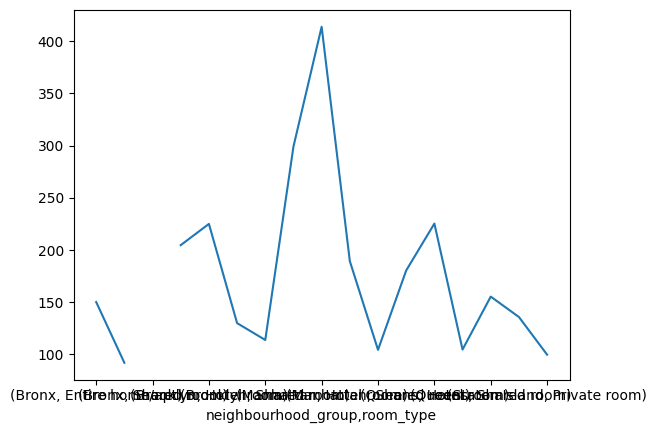

In [36]:
merged.groupby(['neighbourhood_group','room_type'])['price'].mean().plot()